# **Laborator 8: Rețele neuronale**

În această lucrare de laborator se prezintă rețelele neuronale si se va implementa un tip de rețea numit **perceptron cu mai multe straturi (MLP).**

O rețea neuronală este un model computațional non-linear inspirat de creierul uman, conceput pentru a recunoaște tipare și a învăța din date. În forma sa cea mai simplă, o rețea neuronală constă din „neuroni” interconectați, organizați în straturi. Fiecare neuron procesează intrări pentru a produce o ieșire, pe care o transmite următorului strat, permițând astfel rețelei să învețe reprezentări complexe. 

Componentele unei rețele neuronale sunt:

1. **Neuron (Perceptron)**: Elementul fundamental al unei rețele neuronale care calculează o combinație liniară a trăsăturilor de intrare pe baza ponderilor $w$ si a deplasamentului $b$:
$$
  z = \sum_{i=1}^{n} w_i x_i + b
$$

2. **Funcția de Activare**: Adaugă non-liniaritate, permițând rețelelor neuronale să învețe relații complexe. Funcțiile cele mai utilizate sunt:


- ReLU (Rectified Linear Unit)
$$ f(z) = max(z, 0)$$

- Sigmoid: Această funcție primește un număr real și îl comprimă într-un interval între 0 și 1, astfel numerele negative mari devin 0, iar numerele pozitive mari devin 1. Se poate folosi de asemenea în clasificare binară pentru a transforma scoruri în probabilități.

$$ f(z) = \frac{1}{1 + e^{-z}} $$

<p align="center">
  <img src="imgs/sigmoid.png" alt="image" width="200" title="Neuron"/>
</p> 
<p align="center"><em>Figura 1. Funcția sigmoid. </em></p>

- Softmax (pentru clasificare multi-clasă): Această funcție este folosită cel mai des pentru a transforma scorurile corespunzătoare claselor într-o distribuție de probabilitate.

$$ f(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{K}e^{z_i}} $$

unde K reprezintă numărul de clase, iar $z_i$ este scorul pentru clasa $i$

<p align="center">
  <img src="imgs/neuron.png" alt="image" width="300" title="Neuron"/>
</p> 
<p align="center"><em>Figura 2. Modelul matematic al unui neuron. </em></p>


Rețelele neuronale sunt modelate ca grupuri de neuroni conectați într-un graf aciclic. Cu alte cuvinte, ieșirile unor neuroni pot deveni intrări pentru alți neuroni. Modelele de rețele neuronale sunt adesea organizate în straturi de neuroni. Pentru rețelele neuronale standard, cel mai comun tip de strat este **stratul complet conectat**, în care toți neuronii dintre două straturi adiacente sunt conectați între ei,
iar neuronii dintr-un singur strat nu au conexiuni între ei. Definim trei tipuri principale de straturi:

- **Stratul de Intrare**: Primește datele brute, fiecare nod reprezentând o trăsătură de intrare.
- **Straturi Ascunse**: Straturi intermediare care învață să extragă trăsături mai complexe.
- **Stratul de Ieșire**: Oferă predicția finală, organizată diferit în funcție de sarcină (de exemplu, un nod pentru clasificare binară sau mai multe noduri pentru clasificare multi-clasă).


Mai jos sunt prezentate două exemple de topologii de rețele neuronale care folosesc straturi complet conectate:

<p align="center">
  <img src="imgs/mlp.png" alt="image" width="600" title="Neuron"/>
</p> 
<p align="center"><em>Figura 3. Stânga, o rețea cu 2 straturi (un strat ascuns și un strat de ieșire). Dreapta, o rețea cu 3 straturi (două straturi ascunse și un strat de ieșire). Aceste rețele folosesc straturi complet conectate, unde fiecare neuron este conectat cu fiecare neuron din stratul următor. </em></p>


### Perceptronii cu Mai Multe Straturi (MLP)
Un perceptron cu mai multe straturi (MLP) este un tip de rețea neuronală format dintr-un strat de intrare, unul sau mai multe straturi ascunse și un strat de ieșire. Fiecare strat din MLP este complet conectat, adică fiecare neuron dintr-un strat este conectat la fiecare neuron din stratul următor.

#### Utilizarea MLP-urilor pentru Clasificare

##### **1. Concepte generale**
În clasificare, scopul MLP-ului este de a împărți datele în clase distincte. În cazul clasificării binare, stratul de ieșire va avea un singur neuron care folosește funcția de activare sigmoid. Astfel, ieșirea rețelei reprezintă probilitatea clasei 1:

$$
p(y = 1 | \mathbf{x}; \boldsymbol{\theta}) = \sigma(a) = \frac{1}{1 + e^{-a}}
$$

unde $y$ reprezintă clasa, $x$ sunt datele de intrare ale retelei, $\theta$ sunt parametrii modelului, $\sigma$ reprezintă funcția sigmoid și $a$ reprezintă **logit-urile**, adică ieșirea ultimului neuron  înaintea aplicării funcției de activare sigmoid. 

În cazul clasificării multi-clasă, stratul de ieșire al rețelei va avea un neuron per clasă care folosește funcția de activare softmax. 

Un perceptron cu mai multe straturi (MLP) încearcă să găsească o suprafață de decizie non-lineară optimă folosind datele de *antrenare*. Astfel, prin procesul de antrenare, modelul își ajustează parametrii (ponderile și deplasamentele), pentru a învăța să separe corect datele de antrenare în clasele corespunzătoare. Scopul este de a obține un model care să poată clasifica datele noi, dintr-un set de test, cu o acuratețe cât mai mare.


##### **2. Împărțirea setului de date**
Împărțirea setului de date în subseturi de antrenare, validare și test este o practică esențială în antrenarea rețelelor neuronale.

1. Setul de Antrenare: Modelul folosește acest subset pentru a-și ajusta parametrii (ponderile și deplasamentul) în timpul antrenării. De obicei, reprezintă cea mai mare parte a datelor, în jur de 60-70% din totalul setului de date.

2. Setul de Validare: Acest subset este folosit pentru a evalua performanța modelului în timpul antrenării și pentru a ajusta hiperparametrii (cum ar fi numărul de straturi, numărul de neuroni etc.). Setul de validare nu influențează direct ajustarea parametrilor modelului, ci oferă feedback pentru a preveni supraantrenarea (overfitting) și pentru a optimiza modelul. De obicei, este în jur de 10-20% din setul de date.

3. Setul de Test: După ce modelul este antrenat și optimizat folosind setul de validare, setul de test este utilizat pentru a evalua performanța finală a modelului. Scopul acestui subset este de a oferi o estimare a capacității modelului de a generaliza pe date noi și necunoscute. De obicei, este în jur de 10-20% din setul de date.


##### **3. Antrenarea MLP**

Pentru a găsi parametrii (ponderile și deplasamentul) optimi ai modelului în timpul antrenării, se definește o funcție de pierdere care măsoară cât de bine corespund predicțiile rețelei cu etichetele reale. 

Astfel în cazul clasificării binare, funcția de pierdere folosită este **binary cross-entropy**:
$$
\text{BCELoss} = -\frac{1}{N} \sum_{i=1}^{N} \left( y_i \cdot \log(\hat{y}_i) + (1 - y_i) \cdot \log(1 - \hat{y}_i) \right)
$$

- unde N reprezintă numărul total de exemple
- $y_i$ este eticheta reală (0 sau 1)
- $\hat y_i$ este probabilitatea prezisă de model pentru clasa pozitivă (1).

Pentru a minimiza funcția de pierdere se folosește de obicei un proces de optimizare iterativ, precum **gradient descent**. Acest algoritm realizează iterativ o actualizare a parametrilor în direcția inversă gradientului pentru a asigura scăderea funcției de pierdere.

Actualizarea parametrilor se realizează astfel:

$$
\theta \leftarrow \theta - \alpha \nabla_{\theta} \text{BCELoss}
$$

- unde α este rata de învățare
- $\nabla_{\theta} \text{BCELoss}$ este gradientul funcției de pierdere față de parametrii și conține derivatele parțiale ale funcției de pierdere față de fiecare parametru al modelului

Gradient descent poate fi aplicat în trei moduri principale: **batch gradient descent**, **stochastic gradient descent (SGD)** și **mini-batch gradient descent**. 

1. Batch gradient descent: Gradientul este calculat folosind întregul set de antrenare la fiecare pas de actualizare.
2. Stochastic gradient descent: Gradientul este calculat și parametrii sunt actualizați pentru fiecare exemplu din setul de antrenare.
3. Mini-Batch Gradient Descent: Setul de date este împărțit în subseturi mici (mini-batch-uri), iar gradientul este calculat și parametrii sunt actualizați pentru fiecare mini-batch.

Pașii antrenării unui MLP sunt: 

1. **Propagarea înainte** (Forward pass): Datele de intrare sunt transmise prin rețea strat cu strat, de la stratul de intrare la cel de ieșire. Fiecare neuron calculează o combinație liniară a intrărilor (suma ponderată a intrărilor plus un termen de deplasament), aplică o funcție de activare și transmite ieșirea mai departe. Această fază produce predicția rețelei pentru un anumit set de intrări.

2. **Calculul erorii** (Funcția de Pierdere): După ce se obține predicția, aceasta este comparată cu valoarea reală (eticheta adevărată). 

3. **Propagarea înapoi** (Backpropagation): În această fază, se calculează derivatelor parțiale ale funcției de pierdere față de fiecare parametru al modelului prin propagarea derivatelor de la stratul de ieșire spre straturile ascunse folosind regula lanțului.

6. **Actualizarea ponderilor**: Ponderile sunt ajustate în sensul descendent al gradientului utilizând metoda gradient descent.

##### **4. Testarea MLP**

În faza de testare a unui MLP, scopul este de a evalua performanța acestuia pe date noi, necunoscute, care nu au fost folosite în antrenare sau validare. În această etapă, modelul realizează doar propagarea înainte (forward pass) pentru a face predicții, fără a mai modifica parametrii. 

În cazul clasificării binare, probabilitatea obținută $p(y=1|x; \theta)$ se va compara cu un prag pentru a găsi clasa prezisă:

$$
\begin{cases}
\text{if } p(y=1|x; \theta) < 0.5 \text{ predict class 0} \\
\text{if } p(y=1|x; \theta) \geq 0.5 \text{ predict class 1}
\end{cases}
$$

În exercițiile din acest laborator, veți folosi o rețea neuronală pentru a recunoaște două cifre scrise de mână, 0 și 1, din imagini ale setului de date MNIST. Aceasta este o sarcină de clasificare binară.

**Ex1. Citirea și vizualizarea datelor.**

Setul de antrenare conține 12665 de exemple cu cifre scrise de mână, zero și unu, stocate în fișierul X_train.npy.

Fiecare exemplu de antrenare este o imagine în tonuri de gri de 28 x 28 pixeli a cifrei respective. Matricea de pixeli 28 x 28 este desfășurată într-un vector de dimensiune 784. Astfel, fiecare exemplu de antrenare devine un rând în matricea de trăsături X. Avem o matrice X de dimensiune 12665 x 784, în care fiecare rând este un exemplu de antrenare al unei imagini cu o cifră scrisă de mână.
$$
X = 
\left(\begin{array}{cc} 
--- (x^{(1)}) --- \\
--- (x^{(2)}) --- \\
\vdots \\ 
--- (x^{(m)}) --- 
\end{array}\right)
$$

În fișierul Y_train.npy sunt stocate etichetele corespunzătoare fiecare exemplu de antrenare:
- dacă y = 0 imaginea reprezintă cifra 0
- dacă y = 1 imaginea reprezintă cifra 1

De asemenea, în fișierele X_test.npy si Y_test.npy se află datele de test în același format.

Se vor citi datele de antrenare si test și se vor vizualiza imaginile astfel:

- se selectează aleator 5 imagini, se formează imaginile de dimensiune 28x28 și se afișează într-un grid
- eticheta fiecărei imagini se va afișa deasupra imaginii


(12665, 784)


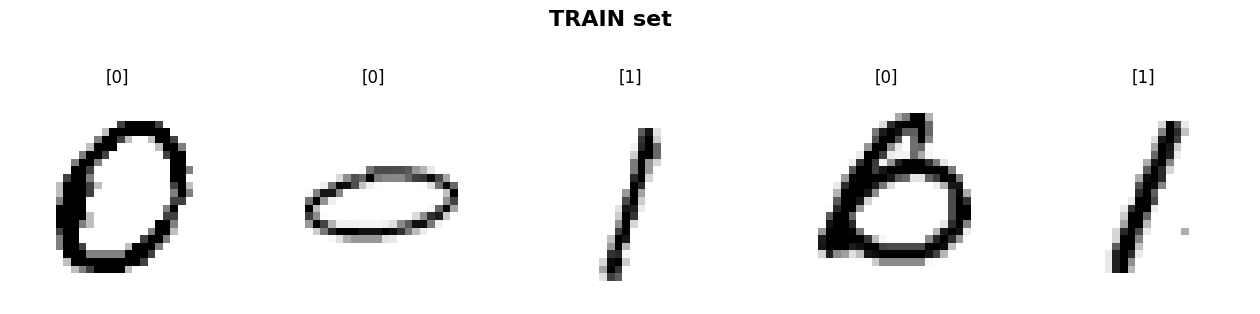

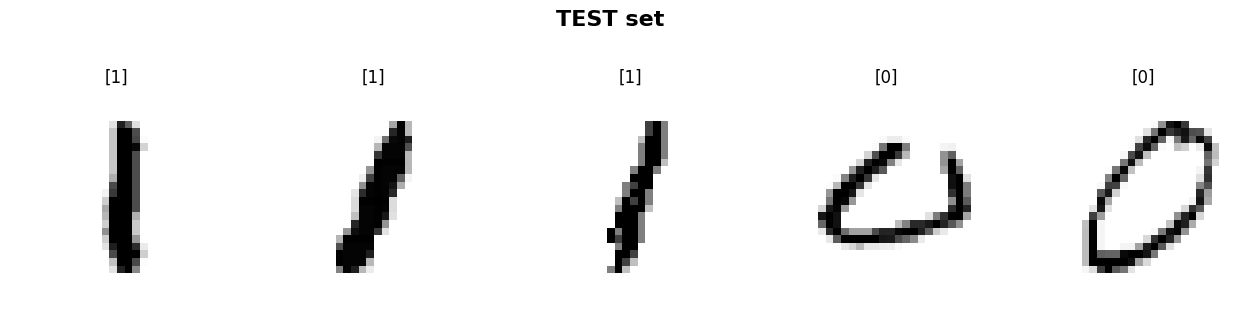

In [27]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

X_train = np.load('MNIST/X_train.npy')
X_test = np.load('MNIST/X_test.npy')
y_train = np.load('MNIST/Y_train.npy')
y_test = np.load('MNIST/Y_test.npy')
print(X_train.shape)


fig_train, ax_train = plt.subplots(figsize=(16, 8), nrows=1, ncols=5)
fig_train.suptitle("TRAIN set", y=0.73, fontsize=16, fontweight='bold')

fig_test, ax_test = plt.subplots(figsize=(16, 8), nrows=1, ncols=5)
fig_test.suptitle("TEST set", y=0.73, fontsize=16, fontweight='bold')

for idx in range(5):
    i, j = np.random.randint(X_train.shape[0]), np.random.randint(X_test.shape[0])
    
    ax_train[idx].imshow(X_train[i].reshape(28, 28), cmap = matplotlib.cm.binary)
    ax_train[idx].set_title(str(y_train[i]))
    ax_train[idx].axis('off')
    
    ax_test[idx].imshow(X_test[j].reshape(28, 28), cmap = matplotlib.cm.binary)
    ax_test[idx].set_title(str(y_test[j]))
    ax_test[idx].axis('off')

**Model**

Rețeaua neuronală are trei straturi dense cu funcții de activare ReLU în straturile ascunse și funcția de activare sigmoid în ultimul strat.

- Intrările sunt valorile pixelilor din imaginile cu cifre. Deoarece imaginile au dimensiunea de 28 x 28 pixeli, rezultă 784 de intrări.
- Rețeaua neuronală are 25 de neuroni în stratul 1, 15 neuroni în stratul 2 și 1 neuron în stratul 3.

Dimensiunile parametrilor rețelei cu straturi dense sunt determinate astfel:

Dacă rețeaua are $n$ neuroni într-un strat și $m$ neuroni în stratul următor, atunci ponderile $W$  vor avea dimensiunea $(n, m)$, iar deplasamentul $b$ va fi un vector cu $m$ elemente.

Astfel, dimensiunile matricilor $W$ și vectorilor $b$ sunt:

- **Stratul 1**: Dimensiunea lui $W_1$ este (784, 25), iar dimensiunea lui $b_1$ este (1, 25).
- **Stratul 2**: Dimensiunea lui $W_2$ este (25, 15), iar dimensiunea lui $b_2$ este (1, 15).
- **Stratul 3**: Dimensiunea lui $W_3$  este (15, 1), iar dimensiunea lui $b_3$ este (1, 1).

Pentru un exemplu de antrenare, fiecare neuron calculează produsul scalar între vectorul de intrare și o coloană din vectorul de ponderi, după care aplică funcția de activare. 

<p align="center">
  <img src="imgs/mlp_architecture.png" alt="image" width="400" title="Neuron"/>
</p> 
<p align="center"><em>Figura 4. Rețea neuronală. </em></p>

**Inițializarea parametrilor**

1. Inițializarea deplasamentului (b) se face de obicei cu 0 sau cu o valoare constantă mică, de exemplu 0.01.


2. Inițializarea ponderilor se poate cu numere aleatorii extrase dintr-o distribuție Gaussiană. 

$$
w \sim \mathcal{N}\left(0, 1 \right)
$$

Astfel se face presupunerea că neuronii din toate straturile vor funcționa bine cu valori extrase din aceeași distribuție, indiferent de dimensiunea lor. În practică acest lucru poate ridica probleme din următoarele motive:

- Ponderi prea mici: Gradienții se micșorează pe măsură ce se propagă prin straturi, devenind în cele din urmă atât de mici încât rețeaua nu mai învață. Acest fenomen este cunoscut sub numele de problema gradienților care dispar (vanishing gradients).

- Ponderi prea mari: Gradienții cresc necontrolat pe măsură ce se propagă prin straturi, ducând la problema gradienților care explodează (exploding gradients).

O soluție la această problemă reprezintă inițializarea He [1], care se folosește mai ales în contextul utilizării funcției de activare ReLU. Astfel, ponderile se extrag dintr-o distribuție normală cu varianța scalată de numărul de intrări ale neuronului $n_{in}$.

$$
w' \sim \mathcal{N}\left(0, \frac{2}{n_{\text{in}}}\right)
$$

În practică, implementarea presupune înmulțirea valorilor extrase din distribuția Gaussiana $\mathcal{N}\left(0, 1 \right)$ cu factorul de scalare astfel:

$$
w' = w \times \sqrt{\frac{2}{n_{in}}}
$$

[1] He, Kaiming, et al. "Delving deep into rectifiers: Surpassing human-level performance on imagenet classification." Proceedings of the IEEE international conference on computer vision. 2015.

**Ex1.Implementarea unei rețele neuronale cu 3 straturi.** Implementați algoritmul de propagare înainte pentru modelul prezentat în Figura 4 și folosiți inițializarea He pentru ponderi $(W_1, W_2, W_3)$ și inițializarea cu 0 pentru deplasamente $(b_1, b_2, b_3)$. Pentru un singur exemplu de antrenare, rulați propagarea înainte și afișați dimensiunile vectorilor de ieșire, a ponderilor și a deplasamentului după fiecare strat.
$$
\begin{aligned}
z_1 &= X \cdot W_1 + b_1, \quad a_1 = \text{ReLU}(z_1) \\
z_2 &= a_1 \cdot W_2 + b_2, \quad a_2 = \text{ReLU}(z_2) \\
z_3 &= a_2 \cdot W_3 + b_3, \quad a_3 = \text{Sigmoid}(z_3)
\end{aligned}
$$

> Realizați o implementare generală care să poate fi folosită și pentru un X cu mai multe exemple de antrenare. <br>
> Vectorizați operațiile de înmulțire. <br>
> Pentru generarea unor valori dintr-o distribuție Gaussiană consultați modulul `np.random`.

In [28]:
np.random.seed(7)
W1 = np.random.randn(784, 25) * np.sqrt(2 / 784)
b1 = np.zeros((1, 25))

W2 = np.random.randn(25, 15) * np.sqrt(2 / 25)
b2 = np.zeros((1, 15))

W3 = np.random.randn(15, 1) * np.sqrt(2 / 15)
b3 = np.zeros((1, 1))


params = {
    "W1": W1, "b1": b1,
    "W2": W2, "b2": b2,
    "W3": W3, "b3": b3
}

def sigmoid(x):

    return 1/(1+np.exp(-x))

def relu(x):
    """
    Computes the ReLU (Rectified Linear Unit) activation function.

    Parameters:
    - x: Input array or scalar (can be a numpy array, list, or single numeric value).

    Returns:
    - result: The ReLU of the input, element-wise if `x` is an array (same shape as `x`).
    """
    return np.maximum(x,0)

def forward(X, params):
    """
    Performs the forward pass of the neural network.

    Parameters:
    - X: Input data (shape: (m, input_size)).
    - params: Dictionary containing weights and biases.

    Returns:
    - activations: Dictionary containing intermediate and final outputs.
    """
    W1, b1 = params["W1"], params["b1"]
    W2, b2 = params["W2"], params["b2"]
    W3, b3 = params["W3"], params["b3"]
    
    z1=np.dot(X,W1)+b1
    a1=relu(z1)

    z2=np.dot(a1,W2)+b2
    a2=relu(z2)

    z3=np.dot(a2,W3)+b3
    a3=sigmoid(z3)

    activations= {
        "z1": z1, "a1": a1,
        "z2": z2, "a2": a2,
        "z3": z3, "a3": a3
    }
    return activations
A=forward(X_train,params)
print(A)

{'z1': array([[ 1.67851940e-01,  6.89818218e-01, -2.29240188e-01, ...,
        -6.23244375e-01,  6.60134440e-01, -8.62512538e-01],
       [ 1.55793938e-01,  6.13438360e-01,  2.02289190e-02, ...,
        -8.69945487e-01,  1.79566025e-01, -4.40699769e-01],
       [-2.54038828e-01,  7.96729073e-01,  2.00334273e-01, ...,
        -3.14200749e-01,  6.98301190e-01, -4.44328439e-01],
       ...,
       [ 2.17814799e-01, -3.81904682e-04, -1.82289141e-02, ...,
        -1.22047109e-01, -3.09061264e-02,  4.91933395e-02],
       [ 1.32941286e-01,  2.12840145e-02,  5.52955746e-02, ...,
         3.02485874e-01, -2.82780488e-02, -4.41235098e-01],
       [ 1.03515538e-01, -2.23922944e-01, -3.83666296e-02, ...,
        -6.19863795e-01,  4.85505042e-01, -8.14334229e-02]],
      shape=(12665, 25)), 'a1': array([[0.16785194, 0.68981822, 0.        , ..., 0.        , 0.66013444,
        0.        ],
       [0.15579394, 0.61343836, 0.02022892, ..., 0.        , 0.17956603,
        0.        ],
       [0.      

**Ex2. Implementați funcția de pierdere binary cross-entropy loss.**

$$
\text{BCELoss} = -\frac{1}{M} \sum_{i=1}^{M} \left( y_i \times \log(\hat{y}_i) + (1 - y_i) \times \log(1 - \hat{y}_i) \right)
$$

- unde M reprezintă numărul de exemple 
- $y_i$ este eticheta reală (0 sau 1)
- $\hat y_i$ este probabilitatea prezisă de model pentru clasa pozitivă (1). 

In [29]:
### YOUR CODE HERE

def binary_cross_entropy(y_true, y_pred):
    """
    Computes the binary cross-entropy loss for a batch of predictions.

    Parameters:
    - y_true: Ground truth labels (shape: (m, 1) or (m,), where m is the batch size). 
              Values should be binary (0 or 1).
    - y_pred: Predicted probabilities (shape: (m, 1) or (m,)). 
              Values should be in the range [0, 1], representing the model's confidence (probability)
              in predicting the positive class.

    Returns:
    - loss: The average binary cross-entropy loss for the batch (scalar value).
    """
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

**Ex3. Calculați gradientul funcției de pierdere BCELOSS în funcție de $\hat{y}$.** Gradientul $\nabla_\hat{y} \text{BCELoss}$ va fi un vector care conține derivatele parțiale ale funcției de pierdere în funcție de fiecare $\hat{y}_i$ și anume $[\frac{\partial \text{BCELoss}}{\partial \hat{y}_0}, \frac{\partial \text{BCELoss}}{\partial \hat{y}_1}, ...]$ 
Atât y, cât și $\hat{y}$ sunt vectori. Gradientul $\nabla_\hat{y} \text{BCELoss}$ are aceeași dimensiune cu $\hat{y}$.

$$
\frac{\partial L}{\partial \hat{y}_i}
= \frac{1}{m} \left( \frac{\hat{y}_i - y_i}{\hat{y}_i (1 - \hat{y}_i)} \right)
$$


In [30]:
### YOUR CODE HERE

def binary_cross_entropy(y_true, y_pred):
    """
    Computes the binary cross-entropy loss for a batch of predictions.

    Parameters:
    - y_true: Ground truth labels (shape: (m, 1) or (m,), where m is the batch size). 
              Values should be binary (0 or 1).
    - y_pred: Predicted probabilities (shape: (m, 1) or (m,)). 
              Values should be in the range [0, 1], representing the model's confidence (probability)
              in predicting the positive class.

    Returns:
    - loss: The average binary cross-entropy loss for the batch (scalar value).
    """
    m=y_true.shape[0]
    return -np.sum(y_true*np.log(y_pred)+(1-y_true)*np.log(1-y_pred))/m
a3=A["a3"]
binary_cross_entropy(y_train,a3)

np.float64(0.6871007803037085)

In [31]:
### RUN TESTS

test_cases = [
    {"y_hat": np.array([0.8, 0.1, 0.5]), "y": np.array([1, 0, 1]), "expected_derivative": np.array([-0.41666667, 0.37037037, -0.66666667])},
    {"y_hat": np.array([[0.4], [0.8], [0.2]]), "y": np.array([[0], [1], [0]]), "expected_derivative": np.array([[0.55555556],[-0.41666667],[ 0.41666667]])}]

for i, case in enumerate(test_cases, start=1):
    y_hat = case["y_hat"]
    y = case["y"]
    expected_derivative = case["expected_derivative"]
    
    computed_derivative = BCE_loss_derivative(y, y_hat)

    matched = np.allclose(computed_derivative, expected_derivative, atol=1e-4)
    
    print(f"Test case: {i}")
    print("Test:", "PASS" if matched else "FAIL")
    
    if not matched:
        print(f"Expected Derivative: {expected_derivative}")
        print(f"Computed Derivative: {computed_derivative}")

NameError: name 'BCE_loss_derivative' is not defined

**Ex4. Calculați derivata funcției sigmoid $\sigma(x)$ față de un input x.**

$$ \sigma'(x) = \sigma(x) \times (1 - \sigma(x))
$$

In [16]:
### YOUR CODE HERE

def sigmoid_derivative(x):
    """
    Computes the derivative of the sigmoid function.

    Parameters:
    - x: Input array or scalar (can be a numpy array, list, or single numeric value).
         Represents the input to the sigmoid function.

    Returns:
    - result: The derivative of the sigmoid function, element-wise if `x` is an array.
              It has the same shape as `x`.
    """
    return sigmoid(x) * (1 - sigmoid(x))

În continuare vom calcula gradientul funcției de pierdere față de fiecare parametru al modelului prin metoda propagării înapoi. 

**Exemplu simplu al propagării inapoi.**

<p align="center">
  <img src="imgs/computational_graph.png" alt="image" width="800"/>
</p> 


Pentru modelul MLP, vom începe prin calcularea derivatei funcției de pierdere față de $a_3$ (probabilitatea prezisă notată și cu $\hat{y}$), după care vom folosi regula lanțului și propagarea înapoi pentru a calcula toate derivatele:

$$
\frac{\partial L}{\partial w_{i,k}} = \frac{\partial L}{\partial \hat{y}_i} \cdot \frac{\partial \hat{y}_i}{\partial w_{i,k}}
$$

**Ex5. Calculați gradientul funcției de pierdere BCE Loss pentru ultimul strat al modelului** pentru un lot (batch) de exemple X de dimensiune (m, input_size). Se vor calcula  $\frac{\partial L}{\partial W_3}$ și  $\frac{\partial L}{\partial b_3}$.


În propagarea înapoi, întâlnim 2 tipuri de înmulțiri:
- dacă în propagarea înainte avem o **transformare liniară**, adică o înmulțire matriceală sau un produs scalar $z = x \cdot W + b$, atunci în propagarea înapoi se folosește tot produs scalar sau înmulțire matriceală pentru a propaga gradienții.

Gradientul lui W se calculează cu regula lanțului în felul următor:

$$
\frac{\partial \text{L}}{\partial W} = x^T \cdot \frac{\partial \text{L}}{\partial z}
$$

unde $\frac{\partial \text{L}}{\partial z}$ reprezintă gradientul venit din stratul anterior, adică din "upstream", iar gradientul lui x se calculează ca:

$$
\frac{\partial \text{L}}{\partial x} = \frac{\partial \text{L}}{\partial z} \cdot W^T 
$$

- dacă în propagarea înainte avem o operație care se aplică **element cu element** asupra unei matrici sau unui vector (precum ReLU, Sigmoid, înmulțire cu un scalar), atunci vom folosi înmulțirea element cu element în propagarea înapoi


Pentru ultimul strat care aplică o transformare liniară $z_3 = a_2 \cdot W_3 + b_3$, unde dimensiunile sunt $a_2(m,p)$, $W_3(p,1)$, $b_3(1, 1)$, $z_3(m, 1)$, $a_3(m, 1)$, iar m este numărul de exemple din lot, regula lanțului se aplică astfel:

**Propagarea înainte $\rightarrow$**:

$$
z_3 = a_2 \cdot W_3 + b_3
$$

$$
a_3 = \text{Sigmoid}(z_3)
$$

**Propagarea înapoi $\leftarrow$**:

$$
\frac{\partial \text{BCELoss}}{\partial z_3} = \frac{\partial \text{BCELoss}}{\partial a_3} \times \frac{\partial a_3}{\partial z_3} \text{(înmulțire element cu element)}
$$

$$
\frac{\partial \text{BCELoss}}{\partial W_3} = \frac{1}{m}a_2^T \cdot \frac{\partial \text{BCELoss}}{\partial z_3}  \text{(înmulțire de matrici)}
$$

$$
\frac{\partial \text{BCELoss}}{\partial b_3} = \frac{1}{m}\sum_{i=0}^{m-1} \frac{\partial  \text{BCELoss}}{\partial z_3^i} \text{(media pe coloane)}
$$ 

> *Hint*: Apelați funcția de propagare pentru batch-ul de exemple de input o singură dată. <br>
> Dimensiunea gradientului în funcție de un parametru este întotdeauna egală cu dimensiunea parametrului <br>
> $a_3$ reprezintă de fapt $\hat{y}$ folosit în calculul `BCELoss`

In [17]:
### YOUR CODE HERE
from typing import Dict, Tuple

def backward_third_layer(y: np.ndarray, 
                        activations: Dict[str, np.ndarray]) -> Tuple[np.ndarray, np.ndarray]:
    """
    Computes vectorized gradients of the last layer for backpropagation over a batch.

    Parameters:
    - y (np.ndarray): True labels for the batch, shape (m, 1).
                      `m` is the number of examples
    - activations (Dict[str, np.ndarray]): Dictionary containing activations and pre-activations of the network.

    Returns:
    --------
    Tuple[np.ndarray, np.ndarray, np.ndarray]
        Gradients computed for the last layer:
        - dz3 : Gradient of the loss w.r.t. the pre-activation (z3), shape (m, 1).
        - dW3  : Gradient of the loss w.r.t. the weights (W3), shape (p, 1).
        - db3  : Gradient of the loss w.r.t. the biases (b3), shape (1, 1).

    """
    a2 = activations["a2"]   
    a3 = activations["a3"]   
    z3 = activations["z3"] 
    m = y.shape[0]
    dz3 = BCE_loss_derivative(y, a3) * sigmoid_derivative(z3)
    dW3 = a2.T.dot(dz3) / m
    db3 = np.mean(dz3)
    return dz3, dW3, db3

def forward_backward_third_layer(X: np.ndarray, 
                                y: np.ndarray, 
                                params: Dict[str, np.ndarray]) -> Tuple[np.ndarray, np.ndarray]:
    """
     Performs a full forward pass for the entire network to compute the intermediate activations 
    and backward pass for the last layer for a single example.

    Parameters:
    - X (np.ndarray): Input features for the batch, shape (m, p).
                      `m` is the number of examples, `p` is the number of features.
    - y (np.ndarray): True labels for the batch, shape (m, 1).
                      `m` is the number of examples
    - params (Dict[str, np.ndarray]): Dictionary containing model parameters (e.g., W3, b3).

    Returns:
    - Tuple[np.ndarray, np.ndarray]: Gradients (dz3, dW3, db3)
    """
    activations = forward(X, params)
    dz3, dW3, db3 = backward_third_layer(y, activations)
    return dz3, dW3, db3

In [18]:
### RUN TESTS

def test_backward(forward_backward_func, params, X_batch, y_batch, expected_dW, expected_db):
     
    # Run forward and backward pass
    W1, b1 = params["W1"], params["b1"]
    W2, b2 = params["W2"], params["b2"]
    W3, b3 = params["W3"], params["b3"]
    _, dW, db = forward_backward_func(X_batch, y_batch, params)
      
    dW_pass = np.allclose(dW, expected_dW, atol=1e-4)
    db_pass = np.allclose(db, expected_db, atol=1e-4)
    
    print("Test Results:")
    print("dW Test:", "PASS" if dW_pass else "FAIL")
    print("db Test:", "PASS" if db_pass else "FAIL")
    
    if not dW_pass:
        print("\nMismatch in dW:")
        print("Computed dW:")
        print(dW)
        print("Expected dW:")
        print(expected_dW)
    
    if not db_pass:
        print("\nMismatch in db:")
        print("Computed db:")
        print(db)
        print("Expected db:")
        print(expected_db)

In [19]:
### RUN TESTS

W1 = np.array([[0.1, -0.05, 0.02],
               [0.03, 0.07, -0.02]])
b1 = np.array([[0.01, 0.02, -0.03]])
W2 = np.array([[0.1, -0.1],
               [0.05, 0.02],
               [-0.03, 0.06]])
b2 = np.array([[0.03, -0.02]])

W3 = np.array([[5.0], [-3.0]])  
b3 = np.array([[0.5]])          

params = {
    "W1": W1, "b1": b1,
    "W2": W2, "b2": b2,
    "W3": W3, "b3": b3
}

X_t = np.array([[1.5, -0.3], [0.7, 2.2]])  
y_t = np.array([[1], [0]]) 

expected_dW3 = np.array([[0.00510939],[0.]])
expected_db3 = np.array([[0.08862105]])

test_backward(forward_backward_third_layer, params, X_t, y_t, expected_dW3, expected_db3)

NameError: name 'BCE_loss_derivative' is not defined

**Ex6. Calculați gradientul funcției de pierdere pentru al doilea strat al modelului pentru un lot de exemple.** Pentru a calcula $\frac{\partial L}{\partial W_2}$ și  $\frac{\partial L}{\partial b_2}$, folosiți gradienții calculați până acum și backpropagation.

**Propagarea înainte $\rightarrow$:**
$$
z_2 = a_1 \cdot W_2 + b_2
$$

$$
a_2 = \text{ReLU}(z_2)
$$

$$
z_3 = a_2 \cdot W_3 + b_3
$$

**Propagarea înapoi $\leftarrow$:**

$$
\frac{\partial \text{BCELoss}}{\partial a_2} = \frac{\partial \text{BCELoss}}{\partial z_3} \cdot W_3^T
$$

$$
\frac{\partial \text{BCELoss}}{\partial z_2} = \frac{\partial \text{BCELoss}}{\partial a_2} \times ReLU'(z_2)
$$

unde 

$$
\text{ReLU'}(x) =
\begin{cases} 
1, & \text{if } x > 0 \\
0, & \text{if } x \leq 0
\end{cases}
$$

$$
\frac{\partial \text{BCELoss}}{\partial W_2} = \frac{1}{m}a_1^T \cdot \frac{\partial \text{BCELoss}}{\partial z_2}  \text{(înmulțire de matrici)}
$$

$$
\frac{\partial \text{BCELoss}}{\partial b_2} = \frac{1}{m}\sum_{i=0}^{m-1} \frac{\partial \text{BCELoss}}{\partial z_2^i} \text{(media pe coloane)}
$$ 

> *Hint*: Refolosiți funcția `backward_third_layer` pentru a calcula $\frac{\text{BCELoss}}{\partial z_3}$.

In [20]:
def relu_derivative(x):
    return (x>0).astype(float)

def backward_second_layer(y: np.ndarray, 
                          params: Dict[str, np.ndarray], 
                          activations: Dict[str, np.ndarray]) -> Tuple[np.ndarray, np.ndarray]:
    """
    Computes vectorized gradients of the second layer for backpropagation over a batch.

    Parameters:
    - y (np.ndarray): True labels for the batch, shape (m, 1).
                      `m` is the number of examples
    - params (Dict[str, np.ndarray]): Dictionary containing model parameters (e.g., W2, b2, W3, b3).
    - activations (Dict[str, np.ndarray]): Dictionary containing activations and pre-activations of the network.

    Returns:
    Tuple[np.ndarray, np.ndarray, np.ndarray]
        Gradients computed for the last layer:
        - dz2 : Gradient of the loss w.r.t. the pre-activation (z2)
        - dW2  : Gradient of the loss w.r.t. the weights (W2)
        - db2  : Gradient of the loss w.r.t. the biases (b2)

    """
    dz3, _, _ = backward_third_layer(y, activations)

    a1 = activations["a1"]
    z2 = activations["z2"]
    W3 = params["W3"]

    da2 = dz3 @ W3.T #loss a2
    dz2 = da2 * relu_derivative(z2)

    m = y.shape[0]
    dW2 = (a1.T @ dz2) / m
    db2 = dz2.sum(axis=0, keepdims=True) / m

    return dz2, dW2, db2

def forward_backward_second_layer(X: np.ndarray, 
                                  y: np.ndarray, 
                                  params: Dict[str, np.ndarray]) -> Tuple[np.ndarray, np.ndarray]:
    """
    Performs a full forward pass for the entire network to compute the intermediate activations 
    and backward pass for the second layer using vectorized operations.

    Parameters:
    - X (np.ndarray): Input features for the batch, shape (m, n).
                      `m` is the number of examples, `n` is the number of features.
    - y (np.ndarray): True labels for the batch, shape (m, 1).
                      `m` is the number of examples
    - params (Dict[str, np.ndarray]): Dictionary containing model parameters (e.g., W2, b2, W3, b3).

    Returns:
    - Tuple[np.ndarray, np.ndarray]: Gradients (dz2, dW2, db2)
    """
    activations = forward(X, params)
    dz2, dW2, db2 = backward_second_layer(y, params, activations)

    return dz2, dW2, db2

In [21]:
### RUN TESTS

W1 = np.array([[0.1, -0.05, 0.02],
               [0.03, 0.07, -0.02]])
b1 = np.array([[0.01, 0.02, -0.03]])
W2 = np.array([[0.1, 0.1],
               [4.0, 2.0],
               [-0.03, 0.06]])
b2 = np.array([[0.03, -0.02]])

W3 = np.array([[5.0], [-3.0]])  
b3 = np.array([[0.5]])          

params = {
    "W1": W1, "b1": b1,
    "W2": W2, "b2": b2,
    "W3": W3, "b3": b3
}

X_t = np.array([[1.5, -0.3], [0.7, 2.2]])  
y_t = np.array([[1], [0]]) 

expected_dW2 = np.array([[ 0.10924257, -0.10250817],[ 0.16265566, -0.09759339], [-0.00244786, 0]])
expected_db2 = np.array([[0.76220853, -0.70211075]])

test_backward(forward_backward_second_layer, params, X_t, y_t, expected_dW2, expected_db2)

NameError: name 'BCE_loss_derivative' is not defined

**Ex7. Calculați gradientul funcției de pierdere pentru primul strat al modelului pentru un lot de exemple.** Pentru a calcula $\frac{\partial L}{\partial W_1}$ și  $\frac{\partial L}{\partial b_1}$, folosiți gradienții calculați până acum și backpropagation. 


**Propagarea înainte $\rightarrow$**
$$
z_1 = X \cdot W_1 + b_1
$$

$$
a_1 = \text{ReLU}(z_1)
$$

$$
z_2 = a_1 \cdot W_2 + b_2
$$


**Propagarea înapoi $\leftarrow$**

$$
\frac{\partial \text{BCELoss}}{\partial a_1} = \frac{\partial \text{BCELoss}}{\partial z_2} \cdot W_2^T
$$

$$
\frac{\partial \text{BCELoss}}{\partial z_1} = \frac{\partial \text{BCELoss}}{\partial a_1} \times ReLU'(z_1)
$$

$$
\frac{\partial \text{BCELoss}}{\partial W_1} = \frac{1}{m}X^T \cdot \frac{\partial \text{BCELoss}}{\partial z_1}
$$

$$
\frac{\partial \text{BCELoss}}{\partial b_1} = \frac{1}{m}\sum_{i=0}^{m-1} \frac{\partial \text{BCELoss}}{\partial z_1^i}
$$ 

> *Hint*: Refolosiți funcția `backward_second_layer` pentru a calcula $\frac{\text{BCELoss}}{\partial z_2}$

In [22]:
def backward_first_layer(X: np.ndarray, 
                                          y: np.ndarray, 
                                          params: Dict[str, np.ndarray], 
                                          activations: Dict[str, np.ndarray]) -> Tuple[np.ndarray, np.ndarray]:
    """
    Computes vectorized gradients of the first layer for backpropagation over a batch.

    Parameters:
    - X (np.ndarray): Input features for the batch, shape (m, n).
                      `m` is the number of examples, `n` is the number of input features.
    - y (np.ndarray): True labels for the batch, shape (m, 1).
                      `m` is the number of examples
    - params (Dict[str, np.ndarray]): Dictionary containing model parameters (e.g., W1, b1, W2, b2, W3, b3).
    - activations (Dict[str, np.ndarray]): Dictionary containing activations and pre-activations of the network.

    Returns:
    Tuple[np.ndarray, np.ndarray, np.ndarray]
        Gradients computed for the last layer:
        - dz1 : Gradient of the loss w.r.t. the pre-activation (z1)
        - dW1  : Gradient of the loss w.r.t. the weights (W1)
        - db1  : Gradient of the loss w.r.t. the biases (b1)
    """
        
    #m = batch size
    #n = nr de features 
    
    W2 = activations["W2"]
    z1 = activations["z1"]
    m = X.shape[0]

    da1 = dz2 @ W2.T
    dz1 = da1 * relu_derivative(z1)

    dW1 = (X.T @ dz1) / m
    db1 = dz1.sum(axis=0, keepdims=True) / m

    return dz1, dW1, db1

def forward_backward_first_layer(X: np.ndarray, 
                        y: np.ndarray, 
                        params: Dict[str, np.ndarray]) -> Tuple[np.ndarray, np.ndarray]:
    """
    Performs a full forward pass for the entire network to compute the intermediate activations 
    and backward pass for the first layer using vectorized operations.

    Parameters:
    - X (np.ndarray): Input features for the batch, shape (m, n).
                      `m` is the number of examples, `n` is the number of input features.
    - y (np.ndarray): True labels for the batch, shape (m, 1).
                      `m` is the number of examples
    - params (Dict[str, np.ndarray]): Dictionary containing model parameters (e.g., W1, b1, W2, b2, W3, b3).

    Returns:
    - Tuple[np.ndarray, np.ndarray]: Gradients (dz1, dW1, db1) for the first layer weights and biases.
    """
    activations = forward(X, params)

    dz3, dW3, db3 = backward_third_layer(y, activations)
    dz2, dW2, db2 = backward_second_layer(y, params, activations)
    dz1, dW1, db1 = backward_first_layer(X, params, activations, dz2)

    return dz1, dW1, db1

In [23]:
### RUN TESTS

W1 = np.array([[0.1, -0.05, 0.2],
               [0.3, 0.7, -0.02]])
b1 = np.array([[0.1, 0.2, -0.3]])
W2 = np.array([[0.1, 0.1],
               [4.0, 2.0],
               [-0.03, 0.06]])
b2 = np.array([[0.03, -0.02]])

W3 = np.array([[5.0], [-3.0]])  
b3 = np.array([[0.5]])          

params = {
    "W1": W1, "b1": b1,
    "W2": W2, "b2": b2,
    "W3": W3, "b3": b3
}

X_t = np.array([[1.5, -0.3], [0.7, 2.2]])  
y_t = np.array([[1], [0]]) 

expected_dW1 = np.array([[-2.60110482e-02, 2.45, 1.83033145e-02],
 [ 1.22202210e-01, 7.7, -3.66066289e-03]])
expected_db1 = np.array([[ 0.00932597, 3.5, 0.01220221]])

test_backward(forward_backward_first_layer, params, X_t, y_t, expected_dW1, expected_db1)

NameError: name 'BCE_loss_derivative' is not defined

**Ex8. Implementați funcția `backward` care calculează gradienții funcției de pierdere față de toți parametrii modelului ($W_1, W_2, W_3, b_1, b_2, b_3$) și face un update al fiecărui parametru în parte cu gradient descent**:

$$
\theta \leftarrow \theta - \alpha \nabla_{\theta} \text{BCELoss}
$$

- unde $\alpha$ este rata de învățare
- $\theta$ reprezintă fiecare parametru al modelului ($W_1, W_2, W_3, b_1, b_2, b_3$)
- Pentru a calcula gradienții, apelați funcțiile implementate mai sus `backward_third_layer`, `backward_second_layer`, `backward_first_layer` 

In [24]:
def backward(X: np.ndarray, 
             y: np.ndarray, 
             params: Dict[str, np.ndarray], 
             activations: Dict[str, np.ndarray], 
             learning_rate: float = 0.001) -> Dict[str, np.ndarray]:
    """
    Performs the backward pass of the neural network and updates the parameters using gradient descent.

    Parameters:
    - X (np.ndarray): Input features for the batch, shape (m, n).
                      `m` is the number of examples, `n` is the number of input features.
    - y (np.ndarray): True labels for the batch, shape (m, 1).
                      `m` is the number of examples
    - params (Dict[str, np.ndarray]): Dictionary containing model parameters (e.g., W1, b1, W2, b2, W3, b3).
    - activations (Dict[str, np.ndarray]): Dictionary containing activations and pre-activations of the network.
    - learning_rate (float, optional): Learning rate for gradient descent. Default is 0.001.

    Returns:
    - Dict[str, np.ndarray]: Updated model parameters after gradient descent.
    """
    dz3, dW3, db3 = backward_third_layer(y, activations)
    dz2, dW2, db2 = backward_second_layer(y, params, activations)
    dz1, dW1, db1 = backward_first_layer(X, y, params, activations)

    params["W3"] -= learning_rate * dW3
    params["b3"] -= learning_rate * db3

    params["W2"] -= learning_rate * dW2
    params["b2"] -= learning_rate * db2

    params["W1"] -= learning_rate * dW1
    params["b1"] -= learning_rate * db1

    return params

**Ex9. Implementați funcția de antrenare.** Se va itera setul de date $X_{train}$ pentru un număr fix de epoci. Într-o epocă se vizitează toate exemplele din setul de antrenare. Se va folosi mini-batch gradient descent, unde se vor propaga înainte doar câte un batch de exemple din setul de antrenare întreg. Afișați la fiecare epocă valoarea funcției de pierdere. Afișați graficul funcției de pierdere.

### Pseudocod

**Input**: 
- `X_train` (training data), `y_train` (training labels)

**Hyperparameters**:
- `num_epochs` (number of epochs)
-  `batch_size` (mini-batch size)
- `learning_rate` (learning rate)

**Output**: 
- Prints average loss per epoch

**Initialize Parameters**:
   ```plaintext
   num_epochs ← 30
   batch_size ← 64  # Mini-batch size
   learning_rate ← 0.1
   num_batches ← floor(X_train.shape[0] / batch_size)  # Number of batches per epoch
```

**Training Loop**:
```plaintext
FOR epoch IN range(1, num_epochs + 1):
    # Shuffle the data at the start of each epoch
    indices ← generate shuffled indices for X_train
    X_train ← reorder X_train using indices
    y_train ← reorder y_train using indices

    epoch_loss ← 0  # Initialize epoch loss

    # Loop over mini-batches
    FOR i IN range(num_batches):
        start ← i * batch_size
        end ← start + batch_size
        
        # Get the mini-batch
        X_batch ← X_train[start:end]
        y_batch ← y_train[start:end]
        
        # Forward pass
        output ← forward(X_batch)
        
        # Compute loss
        loss ← binary_cross_entropy(y_batch, output)
        epoch_loss ← epoch_loss + loss
        
        # Backward pass
        backward(X_batch, y_batch, output, learning_rate)

    # Compute average loss for the epoch
    avg_epoch_loss ← epoch_loss / num_batches
```

In [25]:
### YOUR CODE HERE

# define again W1, W2, W3, B1, B2, B3 and 'params' as you did in ex. 1 

**Ex10. Implementați funcția de testare.** Rulați funcția `forward` pe imaginile din setul de test. Pentru a găsi clasa prezisă, se verifică probabilitatea obținută:

$$
\begin{cases}
\text{if } p(y=1|x; \theta) < 0.5 \text{ predict class 0} \\
\text{if } p(y=1|x; \theta) \geq 0.5 \text{ predict class 1}
\end{cases}
$$

Se va calcula de asemenea acuratețea pe setul de test. Afișați câteva imagini din setul de test și eticheta prezisă.


$$
\text{Accuracy} = \frac{TP + TN}{TP + FP + FN + TN}
$$


> *Hint*:  $p(y=1|x; \theta)$ reprezintă $a_3$


In [26]:
### YOUR CODE HERE

Pentru a întelege mai bine cum funcționează rețelele neuronale și cum învață acestea din date se poate accesa aplicația web [playground.tensorflow.org](https://playground.tensorflow.org/) pentru vizualizarea interactivă a acestora.